# Random Number Generators

In [1]:
import numpy as np 
import pandas as pd
import scipy as sp 
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

## Discrete and Continuous Random Number Generators

### Bernoulli distribution
- Simulate Bernoulli Distribution by tossing a coin with probability of heads p
- Show how the law of large number work


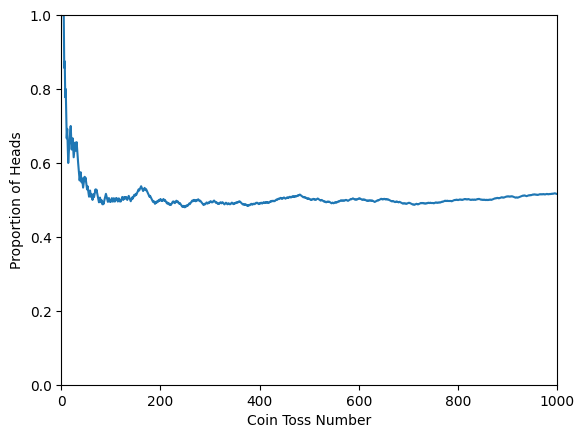

In [3]:
# Bernoulli distribution 
def bernoulli(p, n) : 
    U = rng.random(n)
    return U < p

# Show Law of large number
n = 10000
p = 0.5
toss = bernoulli(p, n)
avg = [sum(toss[:i]) / i for i in range(1, n + 1)]
plt.plot(avg)
plt.xlabel("Coin Toss Number")
plt.ylabel("Proportion of Heads")
plt.axis([0, 1000, 0, 1])
plt.show()

## Normal Distribution

- Gaussian distribution is the most important and foundational probability distribution. The 1-d form is the following $$ f(x) = \frac {e^{\frac {-(x-\mu)^2}{2\sigma^2} }} {\sqrt{2\pi\sigma^2}} $$ with $ E(x) = \mu, Var(x) = \sigma^2 $

- The multidimensional version for $ x \in R^n $ is following : $$ f(x) = \frac {1} {\det(2\pi R)^{\frac 1 2}} e^{-\frac 1 2 (x - \mu)^TR^{-1}(x-\mu)} $$
with R is the covariance matrix : $ R_{i,j} = E[(x_i - \bar x_i)(x_j - \bar x_j)] $

- Key property of normal distribution : 
    - It is completely specified by its first two moments 
    - It is preserved under linear transformation

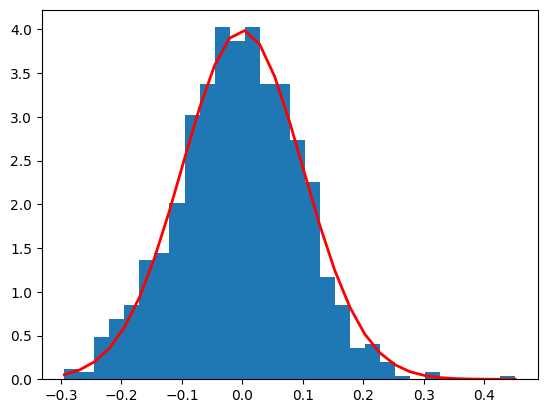

In [4]:
# Draw sample from the distribution 
mu = 0
sigma = 0.1

normal_dis = np.random.normal(mu, sigma, 1000)
# bins is an number, it defines the number of equal-with bins in the range
# density = True, draw and return a probability density
count, bins, inored = plt.hist(normal_dis, 30, density = True )
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))  * np.exp(- (bins - mu)**2 / (2 * sigma ** 2)), linewidth = 2, color = 'r' )
plt.show()

## Multinomial Distribution 
- The multimoial distribution generalizes the binomila distribution. To explain, Consider the problem of n balls to be divided among r bins, where each bin may accommodate more than one ball. The probability that a ball lands in the ith bin is p where sum of all p equal to 1. The binomial distribution is a special case of multinomila distribution with n = 2

In [5]:
# visualization by python
from scipy.stats import multinomial

# first parameter is the number of trials
# second parameter is a array that contain probability of a trial falling into each category. 
ex = multinomial(10, [1/2] * 2) 

# draw random samples from distribution
ex.rvs(4)

array([[4, 6],
       [5, 5],
       [4, 6],
       [6, 4]])

- We define the occupancy vector $e_i \in R^r $ which is a binary vector with exactly one nonzero component. 
- $N_n$ vector can be written as the sum of n vectors X, each drawn from the set $ \{ e_j \} ^r _{j = 1} $ : $$ N_n = \sum ^n _{i = 1} X_i $$ 
- Because X vector are independent and identically distributed so we can easily establish below equality : $$ P(N_n = x) = C_n p_1^{x_1}p_2^{x_2}...p_r^{x_r} $$ with $C_n$ is combinatorial factor that accounts for all the ways a component can sum to $x_j$. We can compute it by below fomular : $$ C_n = \frac {n!} {x_1!x_2!x_3!....x_r!} $$
- The expectation of this distribution is the following : $$ E[N_n] = \sum ^n _{i = 1} p_i $$
- Covariance matrix : $$ Cov(N_n) = ndiag(p) - npp^T $$
- <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html">Related document  <a>

## Chi-Square Distribution
- Suppost that we have n independent random variables $X_i$ such that $ X_i \rightarrow N(0, 1)$. We are interested in the following random variable $ R = \sqrt{\sum _iX^2_i} $
- First of all, we define X which represents a vector of $X_i$ random variables. Because $X_i$ is a independent random variables so the joint probability density of $X_i$ is the following : $$ f_X(X) = \frac {e^{-\frac 1 2  \sum _i X_i^2}} {(2\pi)^{\frac n 2}} $$
- You can easily imagine thr R as the radius of an n-dimensional sphere. The volumns of this sphere is given by the following formula : $$ V_n(R) = \frac {\pi ^{\frac n 2}}{\varGamma(\frac n 2 + 1)} R^n $$ with $ \varGamma $ denots the gamma function.
- To explain more clearly, we define Chi-square distribution is a continuous probability distribution that is used in many hypothesis tests. The shape of it is determined by the parameter k which is the number of independent randome variables in X. In other word, we can say chi-square is the sum of square of standard normal distribution 

![Local Image](./Image/chi-square.png)

- Chi-square distribution start at zero and continue to infinity. The mean of the chi-square distribution is k, and the variance is 2k
- Previously, we mentioned that the chi-square distribution is useful for hyphothesis testing. We will now discuss its application in more detail. 


### Pearson's chi-square test
- Pearson's chi-square tests are statistical  tests for categorical data. They're used to determine whether your data are significantly different from what you expected. 
- Pearson's chi-square test statistic : $$ X^2 = \sum \frac {(O - E)^2} {E} $$ with O is observed frequency, E is expected frequency
- Pearson's chi-square test is the most popular case of the chi-square goodness of fit test. A chi-square goodness of fit test is a goodness of fit test for a categorical variable. Goodness of fit is a measure of how well a statistical model fits a set of observations.

Example : We have a table with three types as columns, observations and frequencies as rows. The question we need to answer is the given frequencies is the same as the frequencies in this observations, isn't it ? 

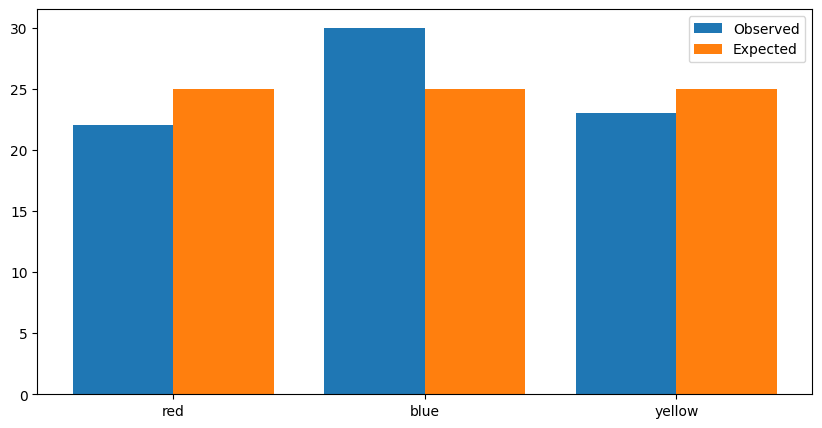

In [11]:
t1_df = pd.DataFrame(data= {
    "red" : [22, 25],
    "blue" : [30, 25], 
    "yellow" : [23, 25]
})
observe = t1_df.iloc[0]
expect = t1_df.iloc[1]
x_axis = np.arange(len(observe))

fig, ax =  plt.subplots(figsize = (10, 5))
ax.bar(x_axis - 0.2, observe,0.4, label = "Observed")
ax.bar(x_axis + 0.2, expect,0.4, label = "Expected" )
ax.set_xticks(x_axis)
ax.set_xticklabels(t1_df.columns)
ax.legend()
plt.show()


In [12]:
# using scipy 
from scipy.stats import chisquare
print(chisquare(f_obs= observe, f_exp= expect))

Power_divergenceResult(statistic=1.5199999999999998, pvalue=0.46766642700990935)


In [16]:
# choose significant level = 0.05 
chis_test = sum([(observe[i] - expect[i])**2 / expect[i] for i in range(len(expect))])
print(chis_test)

1.5199999999999998


C:\Users\Asus\AppData\Local\Temp\ipykernel_27448\1857863135.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  chis_test = sum([(observe[i] - expect[i])**2 / expect[i] for i in range(len(expect))])


![Local Image](./Image/chi-square-table.png)

- significant level < p-value => don't reject $H_0$